### Exercici 1
#### Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [125]:
df = pd.read_csv ("/Users/esthersanroma/Desktop/DATA SCIENCES/preu lloguer per trimestre i barri.csv")
df.sample(10)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
314,2021,3,5,Sarrià-Sant Gervasi,23,Sarrià,Lloguer mitjà mensual (Euros/mes),1345.2
283,2021,2,10,Sant Martí,65,el Clot,Lloguer mitjà per superfície (Euros/m2 mes),12.6
253,2021,2,7,Horta-Guinardó,35,el Guinardó,Lloguer mitjà per superfície (Euros/m2 mes),12.8
455,2021,4,3,Sants-Montjuïc,18,Sants,Lloguer mitjà mensual (Euros/mes),833.7
321,2021,3,6,Gràcia,30,la Salut,Lloguer mitjà mensual (Euros/mes),934.6
73,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
232,2021,2,3,Sants-Montjuïc,14,la Font de la Guatlla,Lloguer mitjà per superfície (Euros/m2 mes),12.5
39,2021,1,7,Horta-Guinardó,40,Montbau,Lloguer mitjà mensual (Euros/mes),741.4
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
20,2021,1,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1598.2


In [126]:
print(df.columns)

Index(['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Lloguer_mitja', 'Preu'],
      dtype='object')


In [127]:
print(df.info())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB
None


Observacions, la columna preu és object i hauria de ser float, te valors nan, que hauran de ser substituits per la mitja del districte, com te valors per mes i valors per m2, s'hauria de buscar les dues. Crearem 2 columnes noves, separant el preu mes i el preu m2, per treballar en més agilitat.


In [128]:
df['Preu'] = pd.to_numeric(df['Preu'],errors = 'coerce') # La columna Preu es object i ha de ser float

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


In [130]:
media_mes_Districte=df[df.Lloguer_mitja== "Lloguer mitjà mensual (Euros/mes)"].groupby("Nom_Districte")["Preu"].mean()
print(media_mes_Districte)

Nom_Districte
Ciutat Vella            858.925000
Eixample               1000.545833
Gràcia                  877.265000
Horta-Guinardó          765.007500
Les Corts              1214.066667
Nou Barris              664.292500
Sant Andreu             721.196154
Sant Martí              916.450000
Sants-Montjuïc          798.932143
Sarrià-Sant Gervasi    1271.212500
Name: Preu, dtype: float64


In [131]:
media_m2_Districte=df[df.Lloguer_mitja== "Lloguer mitjà per superfície (Euros/m2 mes)"].groupby("Nom_Districte")["Preu"].mean()
print(media_m2_Districte)

Nom_Districte
Ciutat Vella           13.775000
Eixample               13.300000
Gràcia                 13.380000
Horta-Guinardó         11.987500
Les Corts              14.008333
Nou Barris             10.922500
Sant Andreu            11.153846
Sant Martí             13.440000
Sants-Montjuïc         12.678571
Sarrià-Sant Gervasi    15.012500
Name: Preu, dtype: float64


In [132]:
df['Preu'].fillna(value=media_mes_Districte, inplace=True) 
print(df['Preu'])

0      759.2
1      929.6
2      808.9
3      879.4
4      918.0
       ...  
579     15.2
580     10.8
581     13.8
582     11.7
583     11.3
Name: Preu, Length: 584, dtype: float64


In [133]:
df['Preu'].fillna(value=media_m2_Districte, inplace=True) 
print(df["Preu"])

0      759.2
1      929.6
2      808.9
3      879.4
4      918.0
       ...  
579     15.2
580     10.8
581     13.8
582     11.7
583     11.3
Name: Preu, Length: 584, dtype: float64


In [134]:
df.isnull().sum()  

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              44
dtype: int64

In [135]:
df["Preu_mes"]=df[df.Lloguer_mitja== "Lloguer mitjà mensual (Euros/mes)"]["Preu"]

In [136]:
df["Preu_m2"]=df[df.Lloguer_mitja== "Lloguer mitjà per superfície (Euros/m2 mes)"]["Preu"]

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            540 non-null    float64
 8   Preu_mes        270 non-null    float64
 9   Preu_m2         270 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 45.8+ KB


#### Crea almenys una visualització per: 
#### Una variable categòrica (Districte o Barri)

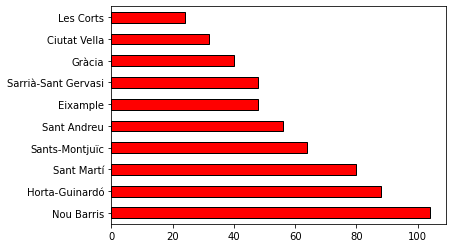

In [138]:
df.Nom_Districte.value_counts().plot(kind="barh",color="red",edgecolor="black")
plt.show()

 #### Una variable numèrica (Preu)

<AxesSubplot:>

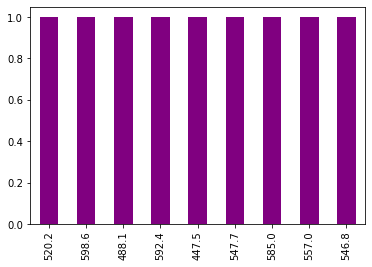

In [139]:
df[df['Preu_mes'] < 600]['Preu_mes'].value_counts().plot(kind="bar",color="purple")


<AxesSubplot:ylabel='Frequency'>

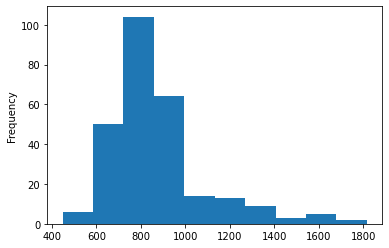

In [141]:
df["Preu_mes"].plot(kind = 'hist')

Text(0.5, 1.0, 'Quin % de dades hi han per trimestre')

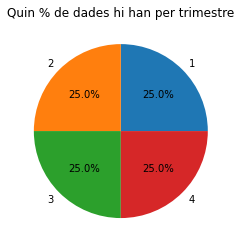

In [142]:
df.Trimestre.value_counts().plot.pie(autopct="%0.1f%%")
plt.ylabel("")
plt.title("Quin % de dades hi han per trimestre")

#### Una variable numèrica i una categòrica (Districte i Preu)

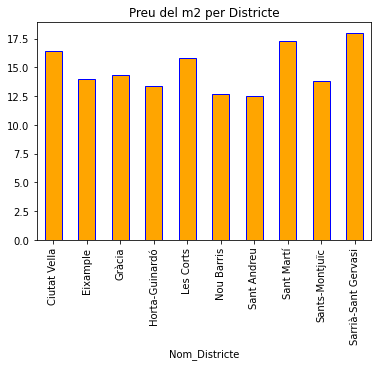

In [143]:
df.groupby(["Nom_Districte"])["Preu_m2"].max().plot(kind="bar",align="center",color="orange",edgecolor="blue")
plt.ylabel("")
plt.title("Preu del m2 per Districte")
plt.show()


#### Dues variables numèriques (Any o Trimestre i Preu)

Text(0.5, 1.0, 'Preu del lloguer per trimestre')

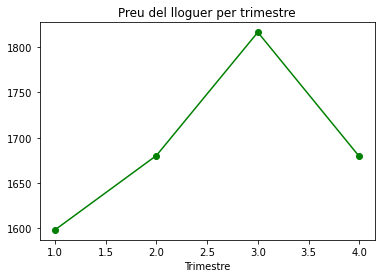

In [144]:
df.groupby("Trimestre")["Preu_mes"].max().plot(kind="line", x="Trimestre", y="Preu_mes",color="green",marker = 'o')
plt.title("Preu del lloguer per trimestre")

#### Tres variables (Barri o Districte, Trimestre i Preu)

Text(0.5, 1.0, 'Districte Les Corts, el preu/mes més alt per barri')

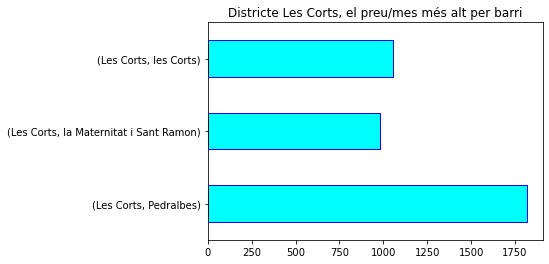

In [150]:
Les_Corts=df[(df.Nom_Districte=="Les Corts")].groupby(["Nom_Districte","Nom_Barri"])["Preu_mes"].max()
Les_Corts.plot(kind="barh",color="cyan",edgecolor="blue")
plt.ylabel("")
plt.title("Districte Les Corts, el preu/mes més alt per barri")

### Exercici 2
#### Exporta els gràfics com imatges o com HTML.

In [146]:
plt.savefig("Gràfica Matplotlib.jpg")

<Figure size 432x288 with 0 Axes>

### Exercici 3
#### Proposa alguna visualització que creguis que pot resultar interessant.



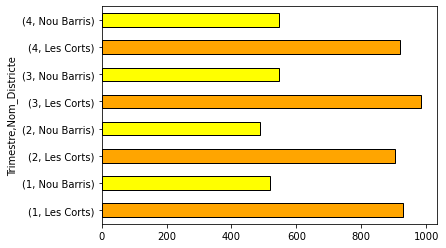

In [152]:
df[(df.Nom_Districte=="Les Corts")|(df.Nom_Districte=="Nou Barris")
  ].groupby(["Trimestre","Nom_Districte" ])["Preu_mes"
    ].min().plot(kind='barh',color=("orange","yellow"),edgecolor="black")




plt.savefig("Gràfica Matplotlib Les Corts i Nou Barris.jpg")

Nou Barris, el districte més barat i Les Corts el districte més car, comparació del min valorper Trimestre

In [148]:
a = df.pivot_table('Preu_m2', 'Trimestre', 'Nom_Districte')
print(a)


Nom_Districte  Ciutat Vella   Eixample  Gràcia  Horta-Guinardó  Les Corts  \
Trimestre                                                                   
1                    13.475  13.200000   13.34           11.81  13.433333   
2                    13.775  13.133333   13.20           11.97  14.200000   
3                    13.875  13.283333   13.48           12.06  14.366667   
4                    13.975  13.583333   13.50           12.11  14.033333   

Nom_Districte  Nou Barris  Sant Andreu  Sant Martí  Sants-Montjuïc  \
Trimestre                                                            
1                   10.94    11.550000       13.34       12.728571   
2                   10.91    10.628571       13.32       12.600000   
3                   10.96    11.233333       13.69       12.628571   
4                   10.88    11.271429       13.41       12.757143   

Nom_Districte  Sarrià-Sant Gervasi  
Trimestre                           
1                        15.150000  
2    

Text(0.5, 1.0, 'El Preu/m2 dels districtes de BCN per Trimestre')

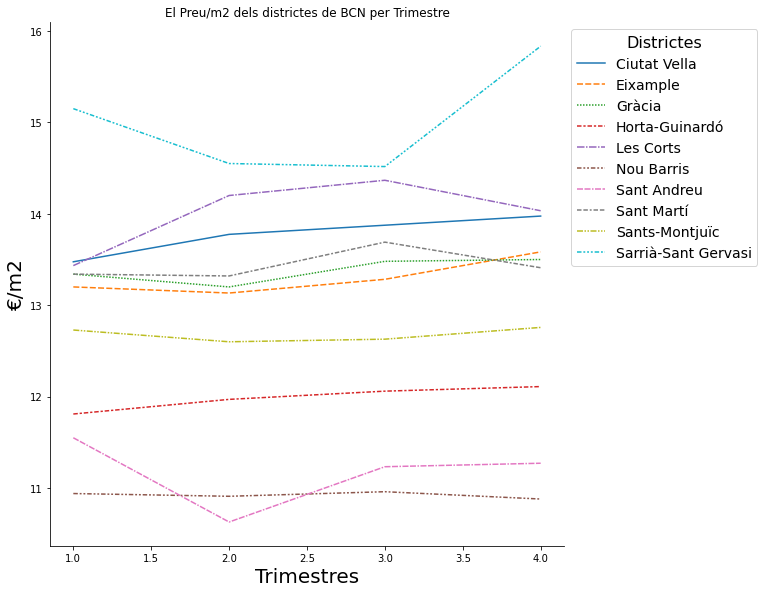

In [163]:
b =sns.relplot(data=a, kind='line', height=8)
b._legend.remove()
plt.ylabel('€/m2', fontsize=20)
plt.xlabel('Trimestres', fontsize=20)

plt.legend( bbox_to_anchor=(1, 1) ,title='Districtes', fontsize='14', title_fontsize='16') 
plt.title("El Preu/m2 dels districtes de BCN per Trimestre")